<a href="https://colab.research.google.com/github/S10955004/bigdata/blob/main/0518_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(SportsAnalytics)
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  



Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           29.02535             -0.01681              1.31181  
         PositionPF           PositionPG           PositionSF  
          -29.81577            -57.56647            -39.12716  
         PositionSG  
          -58.55942  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    117300000 
Residual Deviance: 1963000 	AIC: 5966

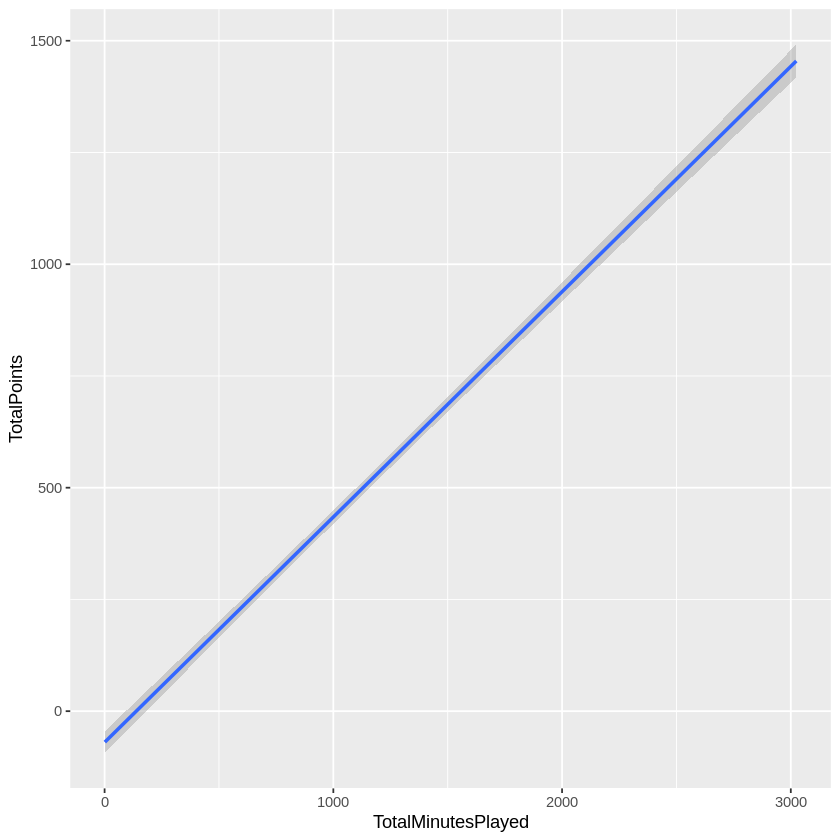

In [5]:
NBA1718<-fetch_NBAPlayerStatistics("17-18")
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_smooth(method="glm")
lm(TotalPoints~TotalMinutesPlayed,data=NBA1718)
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1718)

In [9]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [11]:
mydata$rank<-factor(mydata$rank)
mylogit<-glm(admit~gre+gpa+rank,data=mydata,family="binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [12]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(rpart)

In [17]:
DT<-rpart(Position~Blocks+ThreesMade+Assists,Steals,data=NBA1718)
DT

n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 539 13751 SG (0.12 0.16 0.23 0.22 0.27)  
   2) ThreesMade< 5.5 181   914 C (0.62 0.2 0.044 0.11 0.031) *
   3) ThreesMade>=5.5 358 11431 SG (0.046 0.16 0.26 0.23 0.31)  
     6) Assists>=176 106  4422 PG (0.065 0.056 0.44 0.13 0.31)  
      12) Blocks>=28.5 38  1997 SG (0.16 0.089 0.15 0.23 0.37)  
        24) ThreesMade< 126 25  1335 C (0.28 0.11 0.26 0.17 0.18)  
          48) ThreesMade>=49.5 17   812 C (0.38 0.13 0.37 0.077 0.047) *
          49) ThreesMade< 49.5 8   274 SG (0.044 0.079 0 0.38 0.5) *
        25) ThreesMade>=126 13   483 SG (0 0.055 0 0.32 0.63) *
      13) Blocks< 28.5 68  1763 PG (0 0.034 0.62 0.069 0.27) *
     7) Assists< 176 252  5887 SF (0.028 0.25 0.096 0.32 0.31)  
      14) Blocks>=20.5 92  2788 PF (0.046 0.4 0.022 0.36 0.18)  
        28) ThreesMade< 160 84  2278 PF (0.052 0.45 0.025 0.35 0.13) *
        29) ThreesMade>=160 8   22

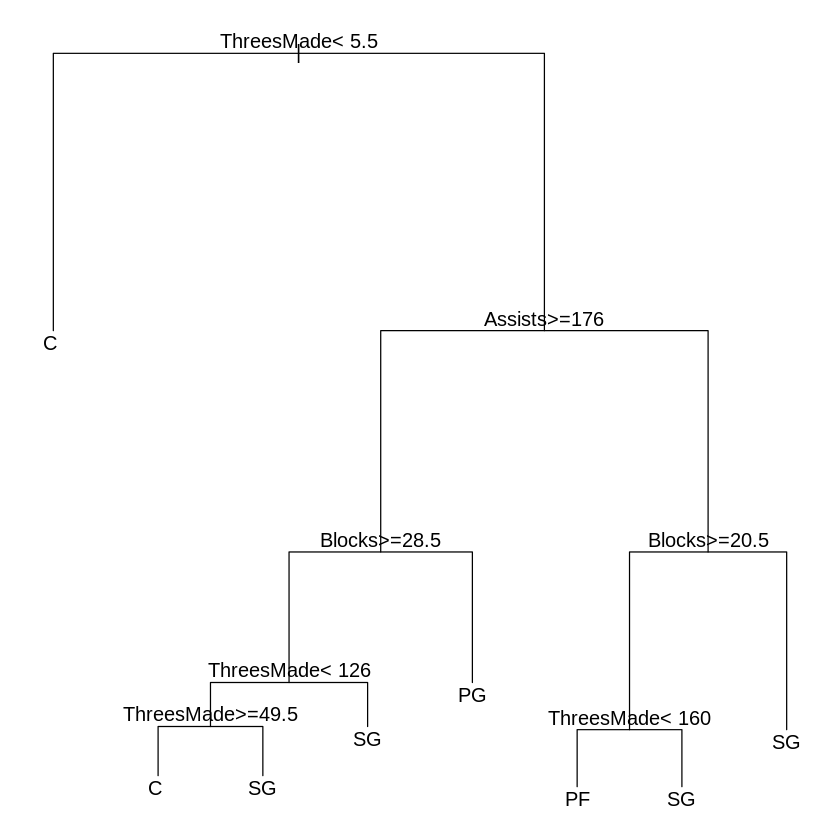

In [18]:
par(mfrow=c(1,1),mar=rep(1,4))
plot(DT)
text(DT,use.n=F,cex=1)

In [19]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



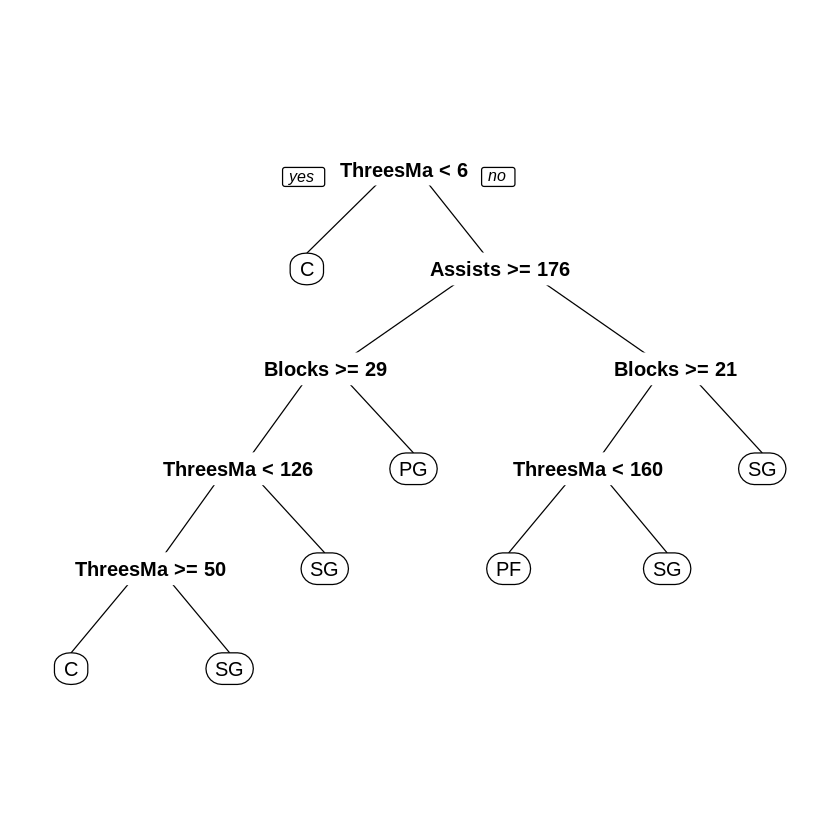

In [20]:
prp(DT)

In [21]:
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [22]:
install.packages("datasets")
library(datasets)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [23]:
data(Groceries)
Groceries@data@Dim

[1]  169 9835

In [25]:
rules<-apriori(Groceries,parameter=list(supp=0.001,conf=0.8),control=list(verbose=F))

In [26]:
options(digits=2)

In [27]:
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [29]:
rules<-sort(rules,by="confidence",decreaseing=TRUE)
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [34]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="whole milk"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [35]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="sugar"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                          rhs     support confidence coverage lift count
[1] {flour,baking powder}     => {sugar} 0.0010  0.56       0.0018   16   10   
[2] {flour,margarine}         => {sugar} 0.0016  0.43       0.0038   13   16   
[3] {flour,soda}              => {sugar} 0.0011  0.39       0.0028   12   11   
[4] {margarine,baking powder} => {sugar} 0.0011  0.37       0.0031   11   11   
[5] {curd,flour}              => {sugar} 0.0011  0.35       0.0032   10   11   


In [38]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="bottled beer"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {soda,liquor}           => {bottled beer} 0.0012  0.57       0.0021    7.1
[3] {liquor}                => {bottled beer} 0.0047  0.42       0.0111    5.2
[4] {herbs,bottled water}   => {bottled beer} 0.0012  0.40       0.0031    5.0
[5] {whole milk,soups}      => {bottled beer} 0.0011  0.38       0.0029    4.7
    count
[1] 19   
[2] 12   
[3] 46   
[4] 12   
[5] 11   


In [39]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="whole milk"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [40]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="yogurt"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs         rhs                support confidence coverage lift count
[1] {yogurt} => {whole milk}       0.056   0.40       0.14     1.6  551  
[2] {yogurt} => {other vegetables} 0.043   0.31       0.14     1.6  427  
[3] {yogurt} => {rolls/buns}       0.034   0.25       0.14     1.3  338  
[4] {yogurt} => {tropical fruit}   0.029   0.21       0.14     2.0  288  
[5] {yogurt} => {soda}             0.027   0.20       0.14     1.1  269  


In [42]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="rice"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs       rhs                     support confidence coverage lift count
[1] {rice} => {whole milk}            0.0047  0.61       0.0076   2.4  46   
[2] {rice} => {other vegetables}      0.0040  0.52       0.0076   2.7  39   
[3] {rice} => {root vegetables}       0.0032  0.41       0.0076   3.8  31   
[4] {rice} => {yogurt}                0.0023  0.31       0.0076   2.2  23   
[5] {rice} => {fruit/vegetable juice} 0.0019  0.25       0.0076   3.5  19   


In [43]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
    appearance=list(default="rhs",lhs="bottled beer"),
    control=list(verbose=F))
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  
